In [12]:
from scipy import *
from pylab import *
import numpy as np

####################################################
### test plots for neutrino batch fiducial model ###
####################################################

kcamb, Pcamb = np.loadtxt('camb/camb_mnv0.10000_om0.30000_As2.1000_matterpow_0.dat').T
kcamb0, Pcamb0 = np.loadtxt('camb/camb_mnv0.00000_om0.30000_As2.1000_matterpow_0.dat').T
#khalofit, Phalofit = np.loadtxt('camb_NL_matterpow_037.dat').T
#khalofit0, Phalofit0 = np.loadtxt('camb_Mnv0_NL_matterpow_037.dat').T
kgadget, Pgadget, Nmodes = np.loadtxt('matterpower/mnv0.10000_om0.30000_As2.1000-PK-DM-snapshot_050').T
kgadget0, Pgadget0, Nmodes = np.loadtxt('matterpower/mnv0.00000_om0.30000_As2.1000-PK-DM-snapshot_050').T

Boxsize=256.0
kgadget *= 2*pi/Boxsize
Pgadget *= Boxsize**3
Pgadget0 *= Boxsize**3
binsize=5
k0, k1 = kgadget[0::binsize][:-1], kgadget[binsize-1::binsize]
kgadget_bined =0.5*(k0+k1)

Pgadget_bined = average(Pgadget [:-(len(Pgadget)%binsize)].reshape(-1, binsize), 
                        weights=Nmodes[:-(len(Pgadget)%binsize)].reshape(-1, binsize)/sum(Nmodes), 
                        axis=1)

Pgadget0_bined = average(Pgadget0 [:-(len(Pgadget0)%binsize)].reshape(-1, binsize), 
                        weights=Nmodes[:-(len(Pgadget0)%binsize)].reshape(-1, binsize)/sum(Nmodes), 
                        axis=1)



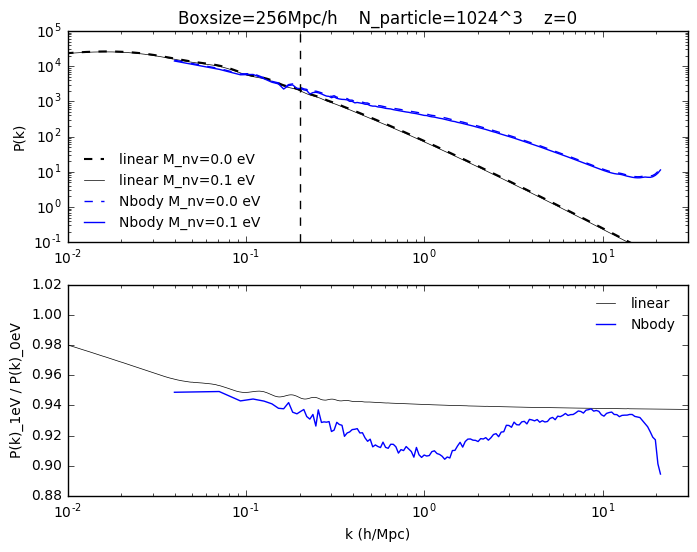

In [17]:
f=figure(figsize=(8,6))
ax=f.add_subplot(211)
ax.plot(kcamb0, Pcamb0, 'k--',lw=1.5,label='linear M_nv=0.0 eV')
ax.plot(kcamb, Pcamb, 'k-',lw=0.5,label='linear M_nv=0.1 eV')
#ax.plot(khalofit0, Phalofit0, 'r--',lw=1.5,label='halofit M_nv=0 eV')
#ax.plot(khalofit, Phalofit, 'r-',lw=0.5, label='halofit M_nv=1 eV')

ax.plot(kgadget_bined, Pgadget0_bined, 'b--', label='Nbody M_nv=0.0 eV')
ax.plot(kgadget_bined, Pgadget_bined, 'b-', label='Nbody M_nv=0.1 eV')

ax.plot((0.2,0.2), (0.1,1e5),'k--')
#ax.set_xlabel('k (h/Mpc)')
ax.set_ylabel('P(k)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-2, 30)
ax.set_ylim(0.1, 1e5)
ax.set_title('Boxsize=256Mpc/h    N_particle=1024^3    z=0')
legend(frameon=0,loc=3,fontsize=10)
ax2=f.add_subplot(212)
ax2.plot(kcamb0[:700],Pcamb[:700]/Pcamb0[:700],'k-',lw=0.5, label='linear')
ax2.plot(kgadget_bined,Pgadget_bined/Pgadget0_bined,'b-',lw=1, label='Nbody')

#ax2.plot(kcamb0[:700],Phalofit[:700]/Phalofit0[:700],'r-',lw=1.5, label='halofit')
ax2.legend(frameon=0,fontsize=10)
ax2.set_xscale('log')
ax2.set_xlim(1e-2, 30)
#ax2.set_ylim(0.7,1)
ax2.set_xlabel('k (h/Mpc)')
ax2.set_ylabel('P(k)_1eV / P(k)_0eV')
show()